In [1]:
# setup
import bq_helper

bitcoin = bq_helper.BigQueryHelper(active_project='bigquery-public-data',
                              dataset_name='bitcoin_blockchain')

bitcoin.list_tables()

['blocks', 'transactions']

**Questions**
1. How many Bitcoin transactions were made each day in 2017?
2. How many transactions are associated with each merkle root?

In [2]:
query1 = '''WITH t AS(
        SELECT TIMESTAMP_MILLIS(timestamp) AS transaction_time, transaction_id
        FROM `bigquery-public-data.bitcoin_blockchain.transactions`
        WHERE EXTRACT(YEAR FROM (TIMESTAMP_MILLIS(timestamp))) = 2017
        )
        SELECT DATE(EXTRACT(YEAR FROM transaction_time), EXTRACT(MONTH FROM transaction_time), EXTRACT(DAY FROM transaction_time)) AS date, COUNT(transaction_id) AS transactions
        FROM t
        GROUP BY 1
        ORDER BY 1
        '''
result1= bitcoin.query_to_pandas(query1)

In [3]:
result1

,date,transactions
0,2017-01-01,180502
1,2017-01-02,290951
2,2017-01-03,301664
3,2017-01-04,328642
4,2017-01-05,288501
5,2017-01-06,346405
6,2017-01-07,282060
7,2017-01-08,260101
8,2017-01-09,269947
9,2017-01-10,323888


Text(0.5,1,'2017 Bitcoin Transactions')

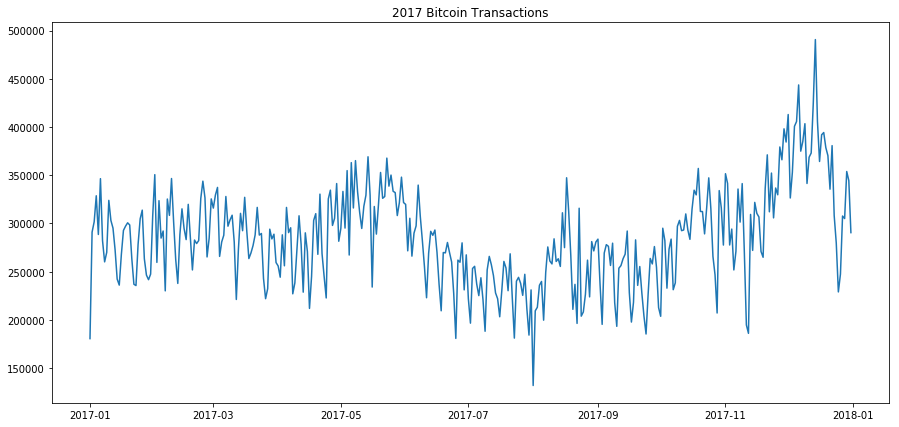

In [4]:
import matplotlib.pyplot as plt

ax = plt.subplots(figsize=(15,7))
plt.plot(result1.date, result1.transactions)
plt.title('2017 Bitcoin Transactions')

In [5]:
query2 = '''SELECT merkle_root, COUNT(transaction_id) AS transactions
        FROM `bigquery-public-data.bitcoin_blockchain.transactions`
        GROUP BY 1
        ORDER BY 2 DESC
        '''
result2 = bitcoin.query_to_pandas(query2)
result2

,merkle_root,transactions
0,dc1bde29f6912ba825138118676988a0e7f839054155db...,12239
1,03ef22104e4561d1c8198015157aa80ec08f1aaef676bf...,9647
2,52461d6e9d181204112ee8ca440921d5df88763ddb6e86...,6451
3,60f1b83982cd4588a8a99b66bb24c5e6d7bb15d34c6a90...,6144
4,73733e699f12f312843b99b309d65ac499c57507d2120f...,6084
5,c59fd39bd08b42ff1d6c175439af2dc74942bb708e517b...,5973
6,e3d2085f137f83e14e572784ad353ed9bcc02a65e3946a...,5946
7,012c4d5cb8c1fb95325d46f6c47634300b89ef4f99fe56...,5944
8,37a3c1b5d1da8450c0b7c2ed1768cc9d8ccd8c5e59fb59...,5937
9,e395b6a84f591ef69be39110e20ffc7c573e5186cf7f09...,5866


For the second question, I did not find it necessary to use "WITH" to create a CTE. My understanding of the question is that I'm counting the sum transactions for each unique Merkle Root - which can be accomplished from simply selecting them from the 'transactions' table without additional codes.